# Introduction to Computer Vision : Image Processing

In this notebook, you'll get introduced to image processing. It is a vital part for any computer vision software and thus as a computer vision engineer, you need to have a grasp on basic image processing techniques.
On this tutorial we will use python as our programming language and use jupyter notebook to run different section of our code just like in matlab.


# Part 0 : Some basic image processing tools

In this section you will be introduced  to some function in image processing. You will will have to do some analysis of those functions and play with them to have a better grasp of image processing 
tools. 

### Convolution Masks 

In image processing, masks are really important, with them you can filter an image. On this section we will see the impact of a gaussian and a laplacian mask on an image. 

You first mission will be to load the rooster and boxes images using openCV and display the image with the cv2.imshow() method


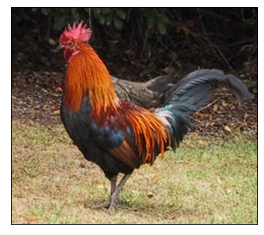

In [1]:
import cv2 
import matplotlib.pyplot as plt
# TO DO : 
path = './rooster.jpg'
# Using cv2.imread() method load the rooster image into a variable named img_rooster
img_rooster = cv2.imread(path) 
# Displaying the image 
img_rooster = cv2.cvtColor(img_rooster, cv2.COLOR_RGB2BGR)
plt.imshow(img_rooster)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()



###### Question 1 :
    What is the shape of the data ?
    What is the type of the data that you have loaded ? 
    Can you tell me what represent each dimension of the img_rooster variable ? 
    What represent the numbers contained in img_rooster ? 
 
    Repeat all previous question for the image representing boxes. 
   
    If you use the matplotlib.pyplot.imshow() method to the rooster image, what happens ? Can you explain how you could fix the display of the image ? 
    

Your second mission will be to build a 5 by 5  gaussian and laplacian masks using numpy arrays

In [2]:
import numpy as np 

def gaussian_filter(kernel_size,sigma,mu):
    x, y = np.meshgrid(np.linspace(-1,1,kernel_size), np.linspace(-1,1,kernel_size))
    d = np.sqrt(x*x+y*y)
    g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
    return g/g.sum()

def laplacian_of_gaussian_filter(kernel_size,sigma,mu):
    lap_filter = gaussian_filter(kernel_size,1/sigma,mu) - gaussian_filter(kernel_size,sigma,mu)
    return lap_filter

kernel_gauss = 5
kernel_laplacian  = 5
sigma_gauss = 10
mu_gaussian = 0

g = gaussian_filter(kernel_gauss,sigma_gauss,mu_gaussian)
l = laplacian_of_gaussian_filter(kernel_gauss,sigma_gauss,mu_gaussian)
print("2D Gaussian-like array:")
print(l)

2D Gaussian-like array:
[[-0.03980033 -0.03994986 -0.03999983 -0.03994986 -0.03980033]
 [-0.03994986 -0.04009995 -0.04014638 -0.04009995 -0.03994986]
 [-0.03999983 -0.04014638  0.95978477 -0.04014638 -0.03999983]
 [-0.03994986 -0.04009995 -0.04014638 -0.04009995 -0.03994986]
 [-0.03980033 -0.03994986 -0.03999983 -0.03994986 -0.03980033]]


###### Question 2 :
How can you apply a mask to an image ? 
Apply those newly created filter to the previously loaded images using opencv cv2.filter2D() method. 
What happens (display the images using matplotlib.pyplot.imshow() method ) ? 
Can you explain the modification to the images ? 
Is it possible to decompose those 2D mask into two 1D mask ? 

Bonus point if you build your own function to apply your mask.


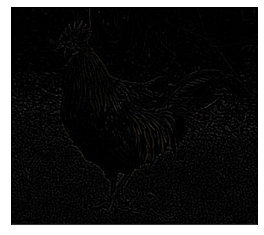

In [3]:
img_blur = cv2.filter2D(img_rooster ,-1,l)
plt.imshow(img_blur)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


You can now play with the cv2 function: cv2.GaussianBlur(img,kernel_size,sigma)

###### Question 3:
    What is the impact of the parameter sigma, what is the impact of the tuple kernel_size ? 

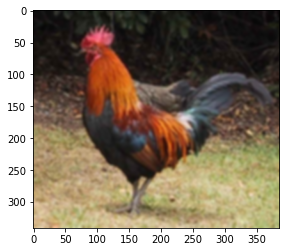

In [4]:
img_blur =  cv2.GaussianBlur(img_rooster,(7,7),2)
plt.imshow(img_blur)

### Pyramid of images 

In computer vision, a pyramid is a multi-scale represantation of an image. It can be used in image compression, feature detection ...

###### Question 4 :
    
    I want you to build a gaussian pyramid with the rooster image with three different scale. Then I want you to build a laplacian pyramid. 
    What happends if you try to up-sample the lowest scale of the gaussian pyramid to the original image size ? 
    Do it again while using the laplacian pyramid to help you reconstruct the image. 
    What is the difference between the two up-sampling method ? 


In [5]:
#TO DO : Build a gaussian and laplacian image pyramid


### Edge detection channel 

Using open cv build in methods like canny, sobel or laplacian edge detection, i want you to process the images plane, face and fireman in order to detect only their outline. In order to reach your end-goal you can use as many build-in filter in opencv. 

##### Question 5

    Can you find the perfect image processing pipeline to detect the outlines ?

In [6]:
#TO DO : Load and process the face,fireman and plane images.

# Part 1 : Starlink Satellites and Nebula

Paul Nicaise is a physicist. As a hobby, he does some astro-photography. He would like to build his own image processing tool but he knows very little in python and image processing algorithm. So as his friend, he asked me to build one for him. 

Obviously, this will be evaluated, so you are forbiden to ask someone else to do it for you ;) 

The first thing you will have to do is to load the images. Since it is raw images they have a specific format.Lucky for us their is a library in python that can read fit images called astropy.

The images provided by Paul Nicaise are a stack of the same scene taken one by one. There is two stack of image : ./ic63 and ./trio_m52

For now, we will use the stack trio_m52.

##### Question 6 
        What is a raw image ?  Using the method fits.open from astropy, I want you open the image : ./trio_m52/PN_Trio_M52_LIGHT_2020-07-08_01-52-38_23_0.00_120.00_300.00s_0.16.fits
        What kind of data are available in the images taken by Paul Nicaise ? Display a section image using matplotlib.pyplot.imshow() method. 
        ZOOM in the image, what pattern do you see ? What is the reason of this pattern appearing in the raw image ?
   

(2822, 4144)


<IPython.core.display.Javascript object>


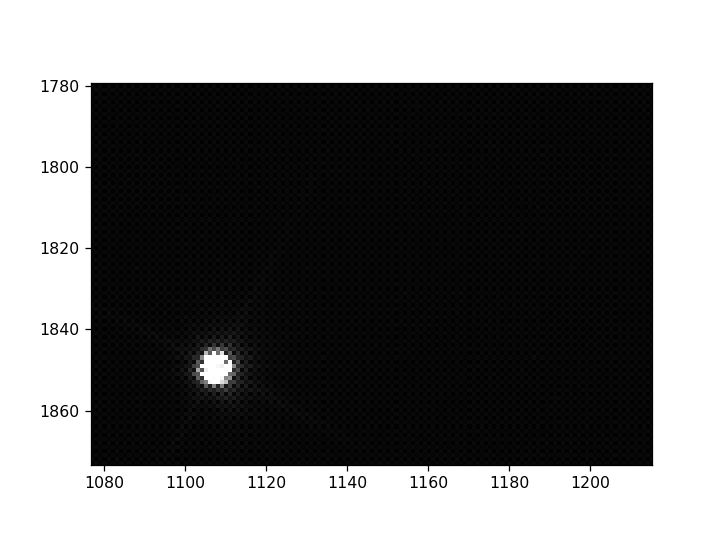

In [22]:
from astropy.io import fits
%matplotlib notebook 
# USED TO INTERRACT WITH THE IMAGE

hdulist = fits.open(".//tp_astro_thomas/trio_m52/PN_Trio_M52_LIGHT_2020-07-08_01-52-38_23_0.00_120.00_300.00s_0.16.fits")
hdu = hdulist[0]
print(hdu.data.shape)
plt.imshow(hdu.data[:,], cmap='gray')

To take picture at night you need to have a long integration time overwise the images would be noisy. The integration time is the amount of time in which the photon are accumulated on your sensor. The reason we have a stack of images instead of one image is because astro-photograph integrate their picture for hours. In order to reduce the issues such as satellites passing by, they cut the frame into several of a few minutes. 

To calibrate each of our images, we need to have 3 things, first, we need a noise image which correspond to the electronic noise of the sensor, also called a master bias image. We also need a master dark level image and finally a master flat image also called vignettage.

##### Question 7
    How do you obtain a flat, dark and bias image ? How do you use them ?
    
The image that you have plotted is a raw image. 
    
    Which operation is needed to go from a raw image to RGB one ? 
    Code your own function that takes a path as an input and read one raw image, then process it to correct the noise and non-uniformity of the image. To do that, you can use the master bias, flat and dark provided with images. Finally compute the RGB image.
    

NB : Be aware that images have a type uint16. It means that every images you are gonna read will have pixel values from 0 to 65535. u means that it is unsigned, means that it is an integer and 16 means that it is coded on 16 bytes.

In computing there is something called casting. It can change the type of a variable to an other type. If you try to cast an int variable to uint, it is possible, but it might cause some computing issues. For example, if you cast a int variable to uint, for example, int16 test = -7, it might be casted to 7.

Be aware that casting and conversion are NOT the same thing. 

In [23]:
import os
import cv2 
import matplotlib.pyplot as plt
import numpy as np 
from astropy.io import fits
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft
from scipy.ndimage import fourier_shift


    ###
    # This section contains all the functions that have been asked to code 
    # in order to do the image processing pipeline.
    ###


def read_im_fit(path_im):
    ###
    # hdu.data[:,:] = read_im_fit(path_im)
    #
    # Input:
    #       path_im = path of a fit image
    # Output:
    #       hdu.data = Raw image. It correspond to the intensity of the image at each pixel
    ###
    hdulist = fits.open(path_im)
    hdu = hdulist[0]
    return hdu.data[:, :]

def compute_aligned_im(im1,im2):
    ###
    # im2_aligned = compute_aligned_im(im1,im2)
    #
    # Input:
    #       im1 = Image that serves a the anchor
    #       im2 = Image to register 
    # Output:
    #       im2_aligned = Raw image. It correspond to the intensity of the image at each pixel
    ###
    shift, error, diffphase = register_translation(im1[:,:,1],im2[:,:,1])
    im2_aligned_to_im1 = np.roll(np.roll(im2,int(shift[1]),1),int(shift[0]),0)
#     scipy.ndimage.shift()
    return im2_aligned_to_im1

def plot_cv_rgb(img):
    cv2.imshow('image_stars_2', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    cv2.resizeWindow('image_stars_2',1900,1000)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def plot_cv_gray(img):
    cv2.imshow('image_stars_2',img)
    cv2.resizeWindow('image_stars_2',1900,1000)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def save_cv_rgb(img):
    cv2.imwrite('./image_stars.png', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    
def compute_extended_histo(img,q1,q2,flag_gray=0):
    if flag_gray:
        min_array = np.percentile(img,100*q1)
        max_array = np.percentile(img,100*q2)        
    else:
        img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        min_array = np.percentile(img_gray,100*q1)
        max_array = np.percentile(img_gray,100*q2)
    img[img < min_array] = min_array
    img[img > max_array] = max_array
    a = (img -  min_array)
    b = (max_array - min_array)
    extended_histogram = np.divide(a, b, out=np.zeros_like(a), where=b!=0)
    return extended_histogram

def compute_extended_histo_minmax(img):
    min_array = img.min()
    max_array = img.max()
    extended_histogram = (img -  min_array)/(max_array-min_array)
    return extended_histogram
    

def compute_im(path_im,white_noise,dark_level,vignettage_correction):
    new_im = read_im_fit(path_im)
    a = new_im[:,:]-white_noise-dark_level
#         temp =a/(vignettage_correction/np.mean(vignettage_correction)),out=np.zeros_like(a), where=vignettage_correction!=0)
    a = a - a.min()
    img = np.divide(a,vignettage_correction/vignettage_correction.mean(),out=np.zeros_like(a), where=vignettage_correction!=0)
         
# temp[temp < 0] = 0
    
    return img

In [24]:
path_master = "./tp_astro_thomas/masters/"
white_noise = read_im_fit(path_master + "master_bias.fit"  )
dark_lvl_ms = read_im_fit(path_master + "master_dark.fit" )
halo_master = read_im_fit(path_master + "master_flat.fit" )
# plt.imshow(vignettage_correction)


reservoir_image = np.empty((2822, 4144),dtype=np.uint16)
path_im_astro = "./tp_astro_thomas//trio_m52/" 
contenu_dossier = os.listdir(path_im_astro)
ijk=0

for files in contenu_dossier:
    path_im = os.path.join(path_im_astro, files)
    if os.path.isfile(path_im) and ijk!=0:
        temp = compute_im(path_im,white_noise, dark_lvl_ms, halo_master)
        reservoir_image = np.dstack((reservoir_image, temp)) 
        
    if os.path.isfile(path_im) and ijk == 0:
        temp = compute_im(path_im, white_noise, dark_lvl_ms, halo_master)
        reservoir_image = temp 
        
    if ijk ==3:
        break
    ijk+=1

You may have noticed some strange lines in the RGB image that I asked you to compute previously. Those lines are starlink satellites. Since the integration time is 5 minutes long, the satellites add noise to the image. This is one reason we do stacks of images in astro-photography.

##### Question 8
   - Code youself a function min-max function that will extend you histogram in order to display the image in a better way.
        Stack the raw images by doing a sum of every single one of them and compute the rgb image. What can you notice about the final RGB image ?
        
NB : The raw images are read as uint16 data. It means that if you sum those data, you will neither be able to get past 65535. To do that, you will have to cast those data into float.

To automate the sum over every images, you can use the method os.listdir(). Here is an example of how to use it.
```
contenu_dossier = os.listdir(path_im_astro)

for files in contenu_dossier:
    path_im = os.path.join(path_im_astro, files)
    if os.path.isfile(path_im):
        read_image_astro(path_im)
```


To register images in astro-photo, you need to first compute their rgb and then use a homography to transform the image. Usually in registration, you use one image as an anchor and then you register the other on the anchor. The registration of image we are gonna use is simple
 ##### Question 9
- I want you to code a method to register the images. Use a cross correlation to compute the translation between two images. you can look at skimage.feature.register_translation to compute the cross correlation. Bonus point if you build you own cross correlation method.


 When you take a picture, you can have some extremum value that makes your dynamic range bigger. But while it gives you more informations, it will be an issue when you want to convert a 16 bit image format to an 8 bit one that you can display.
 
 ##### Question 10
 
 - Now that you can read images, convert them to rgb and register those images, combine all those method to compute the true combination of the image stack.

- Code a more suitable histogram correction function in order to display more details. It should be a function that does a histogram expansion while getting rid of the extremum values of the image. 

- Explain to me what is HDR ( High Dynamic Range) in image processing. What is tone mapping use for ? How could it be usefull to the image processing pipeline we have built ? 

 
 In you report I want you to add an image of this registration.


In [25]:
rgb_debayer_init = cv2.cvtColor(reservoir_image[:,:,0].astype(np.uint16), cv2.COLOR_BAYER_RG2RGB)
reservoir_debayer = np.copy(rgb_debayer_init.astype(np.float32))

for i in range(np.size(reservoir_image,2)):
    rgb_debayer = cv2.cvtColor(reservoir_image[:,:,i].astype(np.uint16), cv2.COLOR_BAYER_RG2RGB)
    aligned_im = compute_aligned_im(rgb_debayer_init,rgb_debayer)
    reservoir_debayer = reservoir_debayer + aligned_im.astype(np.float32)

reservoir_debayer_f = reservoir_debayer/(np.size(reservoir_image,2))

<IPython.core.display.Javascript object>


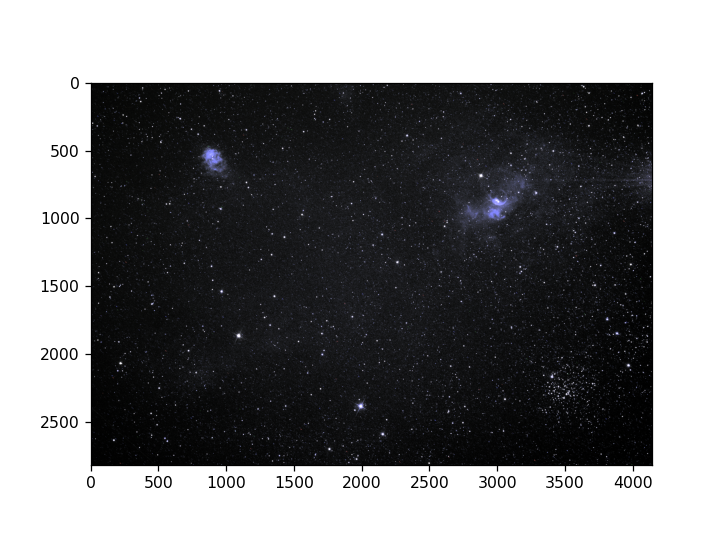

In [26]:
plot_cv_rgb((reservoir_debayer_f[:,:,:])/reservoir_debayer_f[:,:,:].max())
plt.imshow((reservoir_debayer_f[:,:,:])/reservoir_debayer_f[:,:,:].max())


Now that we have realised our image fusion, we want to do some image processing to get a better result. 
 A way to do that is to do some color correction. A simple white balance algorithm consist to try and reach a **"gray world"**. The idea is to correct the images so that the mean value of the red, blue and green color map are the same.
 
##### Question 11 
 - Code a method to apply a white balance color correction to the image fusion.


In [27]:
def compute_white_balance(img):
        
    temp_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_val = temp_gray.mean()
    rgb_mean =(reservoir_debayer_f).mean(axis=(0,1))
    correction_color = rgb_mean/gray_val
    im_final = np.copy(img)
    im_final[:,:,0] = img[:,:,0]/correction_color[0]
    im_final[:,:,1] = img[:,:,1]/correction_color[1]
    im_final[:,:,2] = img[:,:,2]/correction_color[2]
    
    return im_final

im_final = compute_white_balance(reservoir_debayer_f)

In [13]:
plot_cv_rgb(im_final/im_final.max())
plot_cv_rgb(reservoir_debayer_f/reservoir_debayer_f.max())

In [14]:
cv2.imwrite('./image_final_balance.png', (255*(im_final/im_final.max())).astype(np.uint8))

True

In [28]:

#percent by which the image is resized
scale_percent = 25

#calculate the 50 percent of original dimensions
width = int(im_final.shape[1] * scale_percent / 100)
height = int(im_final.shape[0] * scale_percent / 100)

# dsize
dsize = (width, height)

# resize image
output = cv2.resize(im_final, dsize)
# image_bgr = cv2.cvtColor(output/output.max(), cv2.COLOR_RGB2BGR)
cv2.imwrite('./image_final_balance.png', output)

True

Apply this white balance to our image RGB image and display both the original image and the one with a color correction. 
 
##### Question 12
 - What is the difference between both images ? 
 NB : use a histogram expansion
 
 

In [29]:
q1 = 0.05
q2 = 0.997
plot_cv_rgb(cv2.resize(compute_extended_histo(im_final,q1,q2,flag_gray=1),dsize))
plot_cv_rgb(cv2.resize(compute_extended_histo(reservoir_debayer_f,q1,q2,flag_gray=1),dsize))

In [17]:
save_cv_rgb(255*compute_extended_histo(output,q1,q2))

So far because it was faster this way, we applied an histogram correction straight on the RGB image. But it is an issue because doing that we will change the color of the image and what we really want to do when doing a histogram correction, is to change the luminance of the image so that we can see more details. 
##### Question 12
- Which image format could we use to do the histogram correction ? 

- Change the format of the last image computed to a more suitable image format for histogram correction, then apply and display the image correction on this new image

- What is the difference with the previous rgb image and the new one ?

- You can save your image and compare it to mine

- Save new images. 



#### RGB IMAGE

This is the code needed to compute the final rgb color image.

In [30]:
temp_2 = cv2.cvtColor(im_final,cv2.COLOR_RGB2HSV)
temp_2[:,:,2] = compute_extended_histo(temp_2[:,:,2],0.05,0.999,flag_gray=1)
(temp_2[:,:,1])[temp_2[:,:,1]>1]=1
temp_bis_2 = cv2.cvtColor(temp_2,cv2.COLOR_HSV2RGB)

plt.imshow((temp_bis_2))


In [19]:
cv2.imwrite('./image_final_rgb_2.png',cv2.cvtColor(255*(temp_bis_2),cv2.COLOR_RGB2BGR))

True

#### GRAY IMAGE

This is the code needed to compute the final gray color image.

In [31]:
temp = cv2.cvtColor(im_final,cv2.COLOR_RGB2HSV)
temp[:,:,2] = compute_extended_histo(temp[:,:,2],0.05,0.99999,flag_gray=1)
temp[:,:,1] = temp[:,:,1]
(temp[:,:,1])[temp[:,:,1]>1]=1
temp_bis = cv2.cvtColor(temp,cv2.COLOR_HSV2RGB)
temp_bis = cv2.cvtColor(temp_bis,cv2.COLOR_RGB2GRAY)
plot_cv_rgb(cv2.resize(temp_bis,dsize))

In [21]:
cv2.imwrite('./image_final_gray.png',255*temp_bis)

True